In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
df = pd.read_csv('/Users/leilei/Downloads/dl/hyfa/HYFA/data/maizegtex.csv')
df.head
                

<bound method NDFrame.head of                        Unnamed: 0  AC148167.6_FG001  AC149475.2_FG003  \
0                    282set_33.16          59.36576         119.51265   
1                     282set_4226          81.42898          71.25036   
2                       282set_A6          47.75797          78.10419   
3     282set_A214NGoodman.Buckler          60.31933         106.91080   
4                     282set_A239          41.21986         111.39176   
...                           ...               ...               ...   
1765                         Ms71          36.97514          36.97514   
1766                           N6          52.60360          50.60599   
1767                         Oh43          46.00338          36.80270   
1768                          W22          73.26360          36.49357   
1769                         W64A          53.07240          54.29715   

      AC149475.2_FG005  AC149818.2_FG001  AC149818.2_FG006  AC149818.2_FG008  \
0            

In [9]:
import os
import sys
currentPath = os.getcwd().replace('\\','/') 
currentPath

'/Users/leilei/Downloads/dl'

<Axes: xlabel='tissue', ylabel='count'>

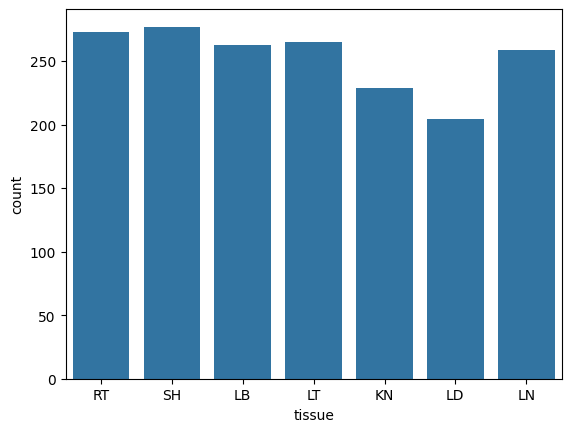

In [11]:
sns.countplot(x = 'tissue', data=df)

In [12]:
class2idx = {
    'RT':0,
    'SH':1,
    'LB':2,
    'LT':3,
    'KN':4,
    'LD':5,
    'LN':6,
}

idx2class = {v: k for k, v in class2idx.items()}

df['tissue'].replace(class2idx, inplace=True)

In [13]:
df.head

<bound method NDFrame.head of                        Unnamed: 0  AC148167.6_FG001  AC149475.2_FG003  \
0                    282set_33.16          59.36576         119.51265   
1                     282set_4226          81.42898          71.25036   
2                       282set_A6          47.75797          78.10419   
3     282set_A214NGoodman.Buckler          60.31933         106.91080   
4                     282set_A239          41.21986         111.39176   
...                           ...               ...               ...   
1765                         Ms71          36.97514          36.97514   
1766                           N6          52.60360          50.60599   
1767                         Oh43          46.00338          36.80270   
1768                          W22          73.26360          36.49357   
1769                         W64A          53.07240          54.29715   

      AC149475.2_FG005  AC149818.2_FG001  AC149818.2_FG006  AC149818.2_FG008  \
0            

In [33]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [34]:
X

,AC148167.6_FG001,AC149475.2_FG003,AC149475.2_FG005,AC149818.2_FG001,AC149818.2_FG006,AC149818.2_FG008,AC149828.2_FG002,AC149829.2_FG006,AC150739.3_FG001,AC155376.2_FG005,...,GRMZM6G901724,GRMZM6G902674,GRMZM6G907181,GRMZM6G910222,GRMZM6G924006,GRMZM6G933659,GRMZM6G942746,GRMZM6G945840,GRMZM6G953609,GRMZM6G982453
0,59.36576,119.51265,0.78113,13.66975,6.63959,0.78113,15.23200,4.29621,1.56226,6.24903,...,26.55837,55.46012,21.48103,117.55983,1.17169,5.07733,10.15467,4.68677,22.26216,1.95282
1,81.42898,71.25036,1.01786,0.00000,20.35724,0.00000,14.25007,3.05359,0.00000,20.35724,...,11.19648,43.76808,37.66090,37.66090,3.05359,2.03572,13.23221,12.21435,9.16076,2.03572
2,47.75797,78.10419,0.00000,5.47227,13.92941,0.49748,7.95966,0.99496,1.49244,10.44706,...,25.37142,30.34621,38.30588,62.18486,0.00000,2.98487,13.43193,2.98487,14.42689,0.99496
3,60.31933,106.91080,0.41600,11.23187,20.38377,0.83199,6.23993,1.24799,2.91197,10.39988,...,23.29574,29.95166,33.69562,78.20712,0.00000,4.57595,8.73590,0.41600,7.90391,1.24799
4,41.21986,111.39176,1.47214,13.24924,5.88855,0.49071,14.23067,2.45356,3.43499,1.47214,...,21.10064,39.74772,29.93347,92.25397,0.98143,3.43499,9.32354,3.92570,13.73995,3.43499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,36.97514,36.97514,3.08126,3.08126,28.96386,0.61625,8.62753,1.23250,0.00000,0.00000,...,134.34301,44.98642,30.19637,69.02026,24.03384,8.01128,16.02256,12.94130,4.31377,4.93002
1766,52.60360,50.60599,0.66587,1.33174,33.95928,0.00000,3.32934,0.00000,0.66587,1.99760,...,58.59641,17.31258,17.31258,52.60360,19.31018,5.32695,19.31018,7.32455,0.66587,0.00000
1767,46.00338,36.80270,0.76672,0.00000,42.16976,0.00000,5.36706,1.53345,1.53345,0.00000,...,77.43902,38.33615,29.90220,49.07027,13.03429,6.13378,14.56774,19.16807,1.53345,3.06689
1768,73.26360,36.49357,1.10587,1.38233,26.26431,1.10587,4.69993,0.82940,3.59406,1.93526,...,93.16918,28.75251,40.36410,42.02290,9.95279,3.31760,13.27039,10.78219,1.38233,5.25286


In [36]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [46]:
def get_class_distribution(obj):
    count_dict = {
        "RT": 0,
        "SH": 0,
        "LB": 0,
        "LT": 0,
        "KN": 0,
        "LD": 0,
        "LN": 0
    }
    
    for i in obj:
        if i == 0: 
            count_dict['RT'] += 1
        elif i == 1: 
            count_dict['SH'] += 1
        elif i == 2: 
            count_dict['LB'] += 1
        elif i == 3: 
            count_dict['LT'] += 1
        elif i == 4: 
            count_dict['KN'] += 1  
        elif i == 5: 
            count_dict['LD'] += 1   
        elif i == 6: 
            count_dict['LN'] += 1            
        else:
            print("Check classes.")
            
    return count_dict

Text(0.5, 1.0, 'Class Distribution in Test Set')

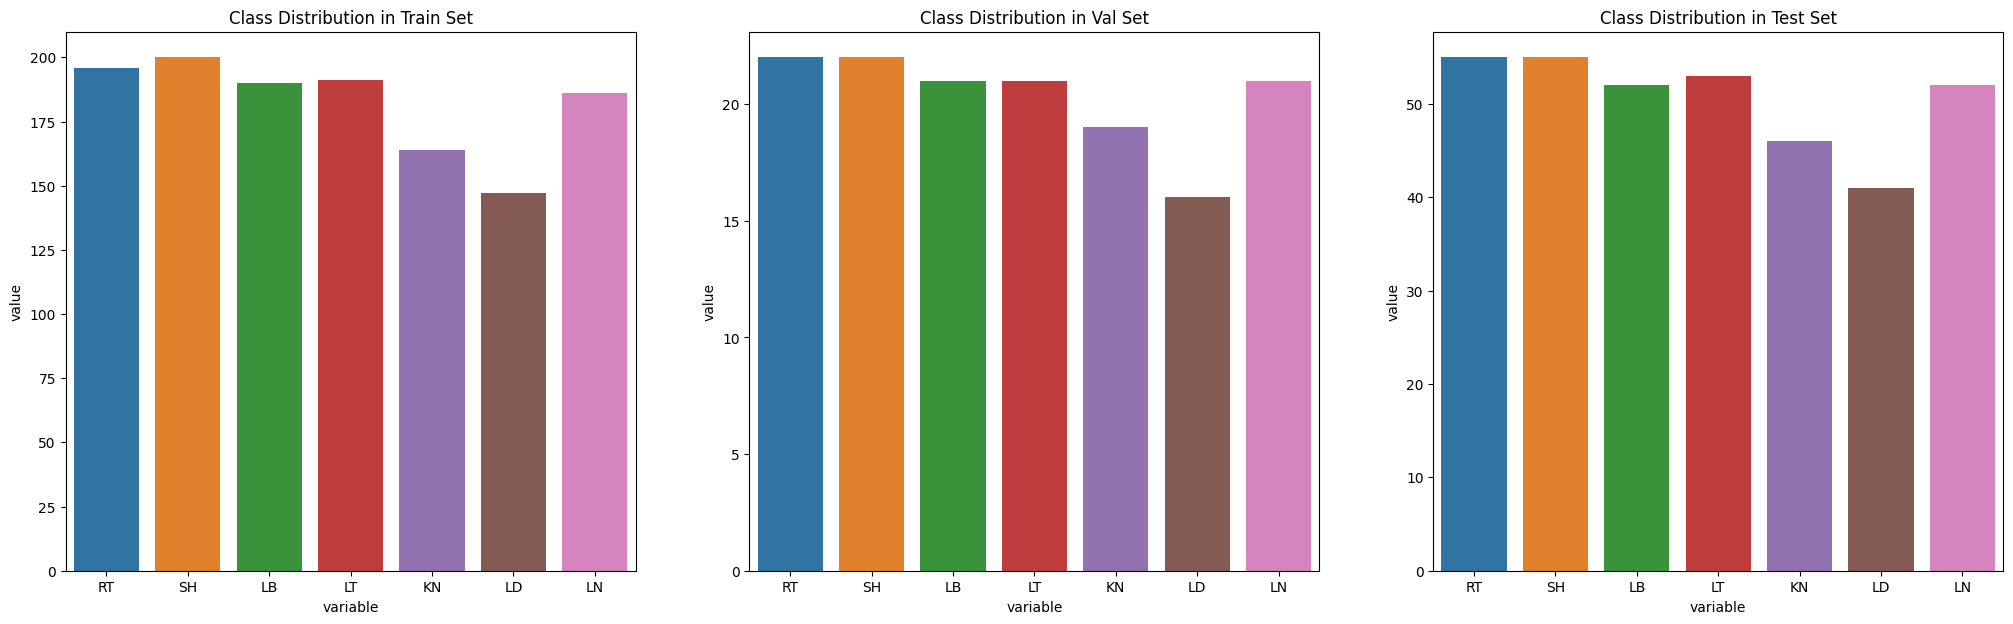

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [48]:
#scale
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_val1 = scaler.transform(X_val)
X_test1 = scaler.transform(X_test)

In [49]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [50]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [51]:
X_train

array([[ 54.85906, 109.71812,   1.23742, ...,   5.36216,  23.9235 ,
          7.01206],
       [ 34.47377,  84.61744,   0.     , ...,   8.35728,   6.00679,
          2.61165],
       [ 46.7685 ,  42.55512,   1.26401, ...,  14.74682,   1.68535,
          5.89873],
       ...,
       [ 36.97514,  36.97514,   3.08126, ...,  12.9413 ,   4.31377,
          4.93002],
       [ 38.84252,  25.27846,   1.84964, ...,  10.48131,   1.2331 ,
          9.86477],
       [ 43.86131, 134.67277,   0.     , ...,   4.32435,  21.00401,
          5.55988]])

In [52]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [53]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0051, 0.0050, 0.0053, 0.0052, 0.0061, 0.0068, 0.0054])


In [54]:
class_weights_all = class_weights[target_list]

In [58]:
#target_list
#class_count
#class_weights
weighted_sampler

In [55]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [85]:
EPOCHS = 20000000000
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 7

In [70]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [71]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [72]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [73]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=15505, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=7, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [74]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [75]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [86]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
model.train()
for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
loss_stats['train'].append(train_epoch_loss/len(train_loader))
loss_stats['val'].append(val_epoch_loss/len(val_loader))
accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


  0%|          | 0/20000000000 [00:00<?, ?it/s]

Epoch 20000000000: | Train Loss: 0.07230 | Val Loss: 0.01975 | Train Acc: 99.325| Val Acc: 100.000


In [88]:
loss_stats

{'train': [0.6333976671099663,
  0.22320098131895066,
  0.12214444107376039,
  0.09263518038205802,
  0.07229507489828393],
 'val': [0.21147450384959368,
  0.08329630612959744,
  0.04201841440943765,
  0.029107486560258647,
  0.019748056353345304]}

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

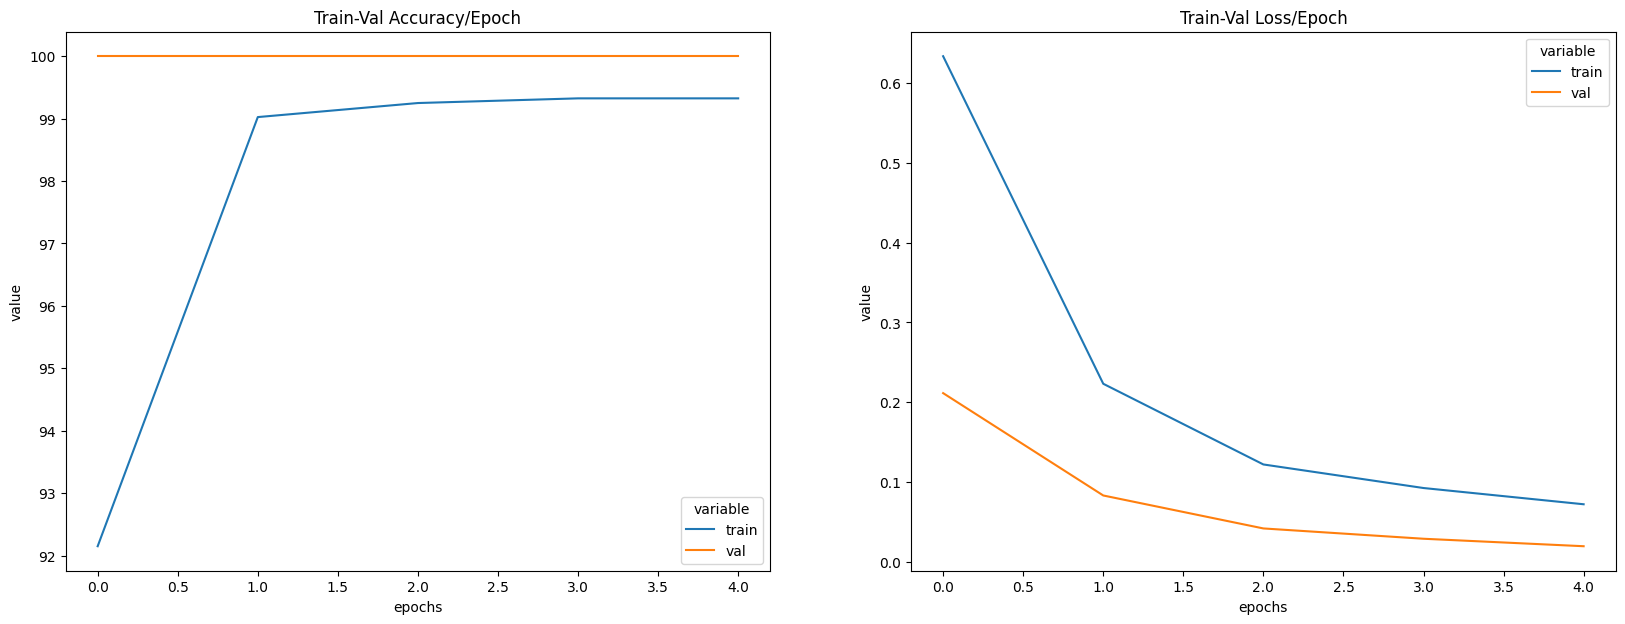

In [87]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [89]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [90]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        52

    accuracy                           1.00       354
   macro avg       1.00      1.00      1.00       354
weighted avg       1.00      1.00      1.00       354



In [94]:
print(y_test,y_pred_list)

[4 3 0 0 0 0 1 3 5 3 4 1 4 2 2 1 1 1 2 2 6 0 3 0 1 6 6 5 1 5 4 3 0 3 6 0 3
 1 3 2 6 3 3 4 4 1 4 0 6 2 5 5 4 3 5 3 0 5 6 3 3 0 1 2 3 6 4 6 3 0 2 1 6 2
 4 0 3 1 4 4 0 5 0 6 5 1 6 3 5 0 4 2 5 1 0 4 2 6 2 4 1 2 0 4 4 2 1 3 4 1 2
 6 4 3 5 1 6 2 0 6 1 6 6 0 6 4 1 3 2 0 0 4 6 1 3 2 6 2 5 4 6 3 5 1 6 2 4 6
 6 6 3 4 2 1 6 6 0 3 2 2 2 0 1 6 0 5 2 3 5 4 6 2 2 1 0 2 6 0 3 1 4 6 5 0 6
 1 1 6 1 2 1 0 3 3 2 3 0 6 2 1 3 0 3 1 2 5 4 6 6 0 0 3 0 4 0 2 2 4 3 5 3 1
 2 5 1 3 2 1 5 4 3 1 5 4 1 2 2 1 6 1 3 6 0 2 5 0 2 6 1 4 1 3 5 4 2 2 3 0 3
 2 5 3 5 6 0 5 2 3 0 5 1 3 1 6 2 1 1 2 5 6 1 0 0 6 1 2 5 3 1 5 0 4 1 5 6 4
 5 6 4 0 1 5 3 4 2 0 0 0 1 2 0 5 6 3 6 0 5 0 4 2 3 0 1 3 0 5 2 5 0 6 6 4 3
 4 4 3 0 6 5 4 3 1 2 0 1 4 4 4 5 6 3 1 5 4] [4, 3, 0, 0, 0, 0, 1, 3, 5, 3, 4, 1, 4, 2, 2, 1, 1, 1, 2, 2, 6, 0, 3, 0, 1, 6, 6, 5, 1, 5, 4, 3, 0, 3, 6, 0, 3, 1, 3, 2, 6, 3, 3, 4, 4, 1, 4, 0, 6, 2, 5, 5, 4, 3, 5, 3, 0, 5, 6, 3, 3, 0, 1, 2, 3, 6, 4, 6, 3, 0, 2, 1, 6, 2, 4, 0, 3, 1, 4, 4, 0, 5, 0, 6, 5, 1, 6, 3, 5, 0, 4, 2, 5, 1